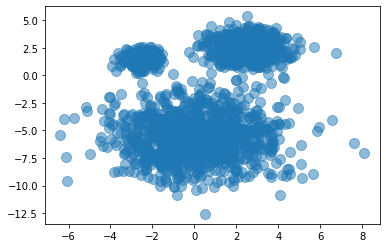

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#generate random data
n = 500
D = 2 # dimensionality of input

X1 = np.random.randn(n, 2) + np.array([0, -2.5])
X2 = np.random.randn(n, 2) + np.array([2.5, 2.5])
X3 = np.random.randn(n, 2) + np.array([-2.5, 2.5])
X = np.vstack([X1, X2, X3])

plt.scatter(X[:, 0], X[:, 1], s=100, alpha=0.5)
plt.show()

In [0]:
def d(x, y):
    diff = x-y
    return diff.dot(diff)

def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        for n in range(len(X)):
            cost += R[n, k]*d(M[k], X[n])
    return cost

def dbi(X, R, M):
    K = len(M)
    sigmas = np.zeros(K)
    for k in range(K):
        diff = X-M[k]
        distance = R[:, k]*(diff**2).sum(axis=1)
        sigmas[k] = np.sqrt(distance.sum()/R[:, k].sum())

    dbi = 0
    for k in range(K):
        maxi = 0
        for j in range(K):
            if k != j:
                num = sigmas[k] + sigmas[j]
                den = d(M[k], M[j])

                maxi = num/den if num/den > maxi else maxi
        
        dbi += maxi

    return dbi/K

def k_means(X, K, max_iter=20, beta=1.0):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.zeros((N, K))

    #centroid intialization
    for k in range(K):
        M[k] = X[np.random.choice(N)]

    grid_width = 5
    grid_height = max_iter/grid_width
    random_colors = np.random.random((K, 3))
    plt.figure(figsize=(20,20))

    costs = []
    for i in range(max_iter):
        #plot step
        colors = R.dot(random_colors)
        plt.subplot(grid_width, grid_height, i+1)
        plt.scatter(X[:,0], X[:,1], c=colors)

        #calculate responsibilities
        for k in range(K):
            for n in range(N):
                R[n, k] = np.exp(-beta * d(M[k], X[n]))/np.sum(np.exp(-beta * d(M[j], X[n])) for j in range(K))

        #recalculate means
        for k in range(K):
            M[k] = R[:, k].dot(X)/np.sum(R[:, k])

        costs.append(dbi(X, R, M))

        if i>0:
            if np.abs(costs[i] - costs[i-1]) < 1e-5:
                break
    plt.show()

    plt.plot(costs)
    plt.title('Cost')
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


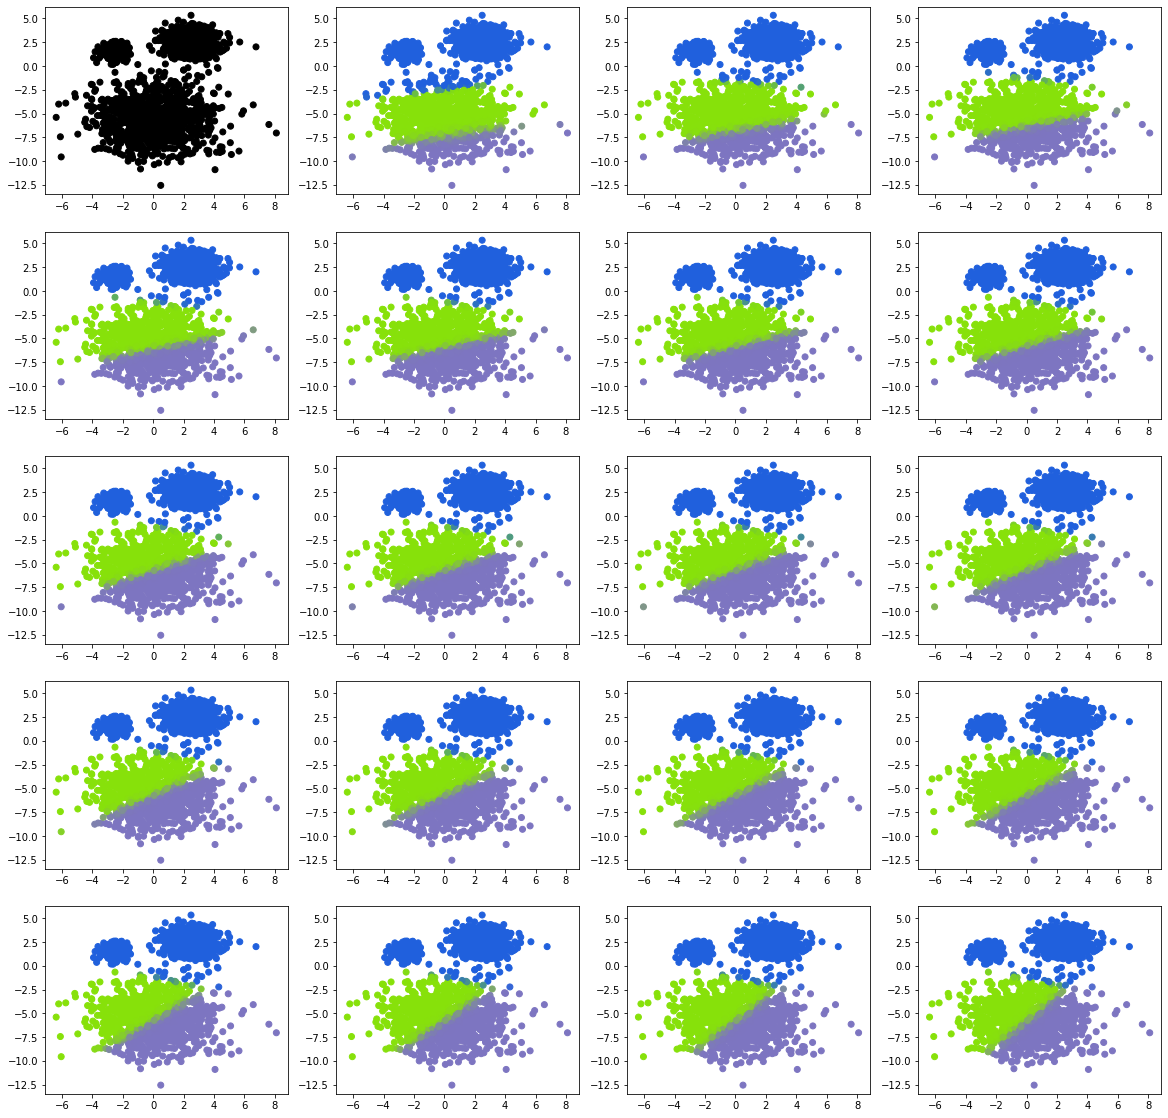

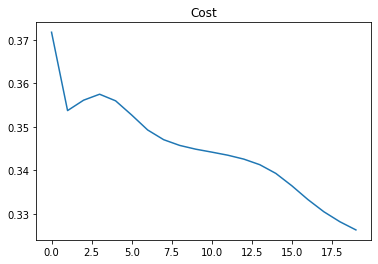

In [0]:
k_means(X, 3)